In [73]:
from fastai2.vision.all import *

In [78]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  get_y = parent_label,
                  splitter = RandomSplitter(),
                  item_tfms = Resize(224))

In [79]:
dsets = dblock.datasets('squares')
dsets.train[0]

(PILImage mode=RGB size=45x44, TensorCategory(12))

In [80]:
dls = dblock.dataloaders('squares')

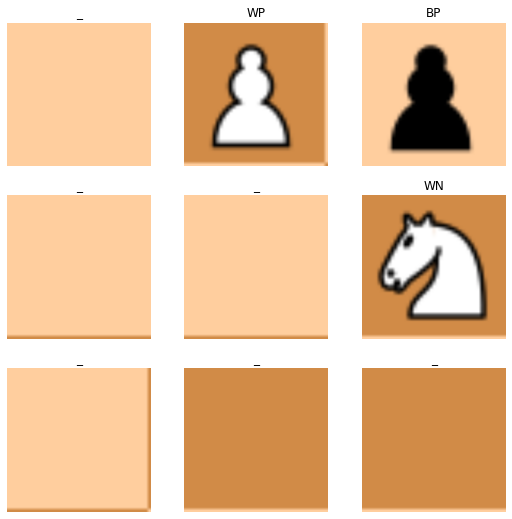

In [81]:
dls.show_batch()

In [82]:
model = cnn_learner(dls, resnet18, metrics=error_rate)

In [83]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.333138,0.000053,0.000000,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.001748,0.000016,0.000000,00:32


In [84]:
model.export()

## Predict

In [85]:
model = load_learner('export.pkl')

In [86]:
from ipywidgets import widgets

In [87]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [90]:
img = PILImage.create(uploader.data[0])

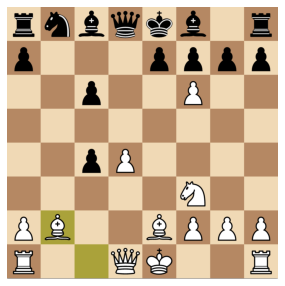

In [91]:
img.show()

In [92]:
w,h = img.shape
w,h

(1043, 1039)

In [93]:
preds = []
for y in range(8):
    for x in range(8):
        box = (x*w/8, y*h/8, (x+1)*w/8, (y+1)*h/8 ) # left, top, right, bottom
        cropped = img.crop(box)
        square = PILImageBW.create(cropped.to_bytes_format())
        pred = model.predict(square)
        preds.append(pred[0])    

In [94]:
len(preds)

64

In [95]:
preds

['BB',
 'BN',
 'BB',
 'BQ',
 'BK',
 'BB',
 '_',
 'BR',
 'BP',
 '_',
 '_',
 '_',
 'BP',
 'BP',
 'BP',
 'BP',
 '_',
 '_',
 'BP',
 '_',
 '_',
 'BB',
 '_',
 'WN',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 'BP',
 'BB',
 '_',
 '_',
 '_',
 'BQ',
 'WN',
 '_',
 'WN',
 '_',
 'WN',
 'WN',
 'WN',
 'WN',
 'WP',
 'WB',
 '_',
 'WN',
 'WB',
 'BQ',
 'BB',
 'BQ',
 'WR',
 '_',
 'WN',
 'WR',
 'WK',
 '_',
 'WN',
 'WR']

In [96]:
label_lib = {
                'WK':'K',
                'WQ':'Q',
                'WR':'R',
                'WB':'B',
                'WN':'N',
                'WP':'P',
                'BK':'k',
                'BQ':'q',
                'BR':'r',
                'BB':'b',
                'BN':'n',
                'BP':'p',
                '_' :'_'
            }

In [97]:
labels = ''.join([label_lib[pred] for pred in preds])

In [98]:
labels

'bnbqkb_rp___pppp__p__b_N__________pb___qN_N_NNNNPB_NBqbqR_NRK_NR'

In [99]:
def trans_rank(rank):
    new_rank = ''
    empty_counter = 0
    for ch in rank:
        if ch == '_':
            empty_counter+=1
        else:
            if empty_counter>0:
                new_rank += str(empty_counter)
                empty_counter = 0
            new_rank += ch
    if empty_counter > 0:
        new_rank += str(empty_counter)
    return new_rank

def label2fen(label):
    ranks = [trans_rank(label[i:i+8]) for i in range(0, 64, 8)]
    return '/'.join(ranks)

In [100]:
label2fen(labels)

'bnbqkb1r/p3pppp/2p2b1N/8/2pb3q/N1N1NNNN/PB1NBqbq/R1NRK1NR'